# Highly Adaptive Models Comparison Project

## Overview

This project aims to empirically compare the performance of two statistical models: the Highly Adaptive Lasso (HAL) and Highly Adaptive Ridge (HAR) in high-dimensional data analysis. Both models are variants of regularization techniques used in regression and machine learning to prevent overfitting by adding a penalty to the loss function. The focus is on evaluating these models in terms of computational efficiency, prediction accuracy, and the effectiveness of regularization under various conditions.

## Goals

1. **Empirical Comparison**: Conduct a thorough empirical comparison between HAL and HAR models to assess their performance on high-dimensional datasets.
2. **Computation Time**: Evaluate and compare the computation times required by each model to fit the data, providing insights into their efficiency.
3. **Prediction Accuracy**: Use metrics such as Mean Squared Error (MSE) to compare the prediction accuracy of the models across different dataset sizes and conditions.
4. **Regularization Effectiveness**: Examine how cross-validation techniques control the regularization parameters in both models, focusing on the L1 norm control in HAR despite its explicit use of L2 regularization.
5. **Scalability**: Assess how each model scales with increasing data dimensions, offering insights into their applicability to real-world, high-dimensional datasets.

## Methodology

The project utilizes a simulation-based approach to generate synthetic datasets with controllable features such as the number of samples, number of features, and the level of noise. The simulation involves:

- Generating datasets using the DGP classes in `generators.py`.
- Fitting both HAL and HAR models to these datasets.
- Evaluating model performance using cross-validation and calculating MSE on a test set.
- Repeating the process for various dataset sizes to gather comprehensive performance data.

## Results Analysis

The simulation results will be analyzed and visualized to compare the computation time and MSE of HAL and HAR models. This analysis aims to provide a clear understanding of each model's strengths and limitations, particularly regarding their efficiency and accuracy in handling high-dimensional data.



In [2]:
# Performance metric R^2 as defined in HAL paper 
def calculate_r_squared(Y, Y_hat):
    ss_res = np.sum((Y - Y_hat) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [2]:
import numpy as np
from data_generators import DataGenerator, SmoothDataGenerator, JumpDataGenerator, SinusoidalDataGenerator
import pandas as pd 
from run_trials import RunTrials
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


# D sizes to test: 1, 3, and 5
d = 1

# Create a list of sample sizes at regular intervals 
sample_sizes = np.arange(start=100, stop=1000, step=100)

# Number of trials to run for each sample size, dgp, model
num_trials = 3

# Create a data generator
dgp = SmoothDataGenerator()

results = RunTrials.run_trials(d, sample_sizes, num_trials, dgp)

# Convert results to DataFrame
df = pd.DataFrame(results)

In [3]:
from train_time_plotter import TrainTimePlotter

# Plot the training time
TrainTimePlotter.plot(df, d, dgp.name)

alt.Chart(...)

In [13]:
d_sizes = [1, 3, 5]
num_trials = 3
sample_sizes = np.arange(start=100, stop=1000, step=100)
data_generators = [SmoothDataGenerator, JumpDataGenerator, SinusoidalDataGenerator]
data_frames = []
all_plots = []

# Run trials for all combinations of d sizes, sample sizes, and data generators
for d in d_sizes:
    for dgp in data_generators:
        results = RunTrials.run_trials(d, sample_sizes, num_trials, dgp)
        df = pd.DataFrame(results)
        all_plots.append(TrainTimePlotter.plot(df, d, dgp.name))
        display(TrainTimePlotter.plot(df, d, dgp.name))
        data_frames.append(df)
        

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [16]:
d_sizes = [1, 3, 5]
num_trials = 5
sample_sizes = np.arange(start=100, stop=2000, step=100)
data_generators = [SmoothDataGenerator, JumpDataGenerator, SinusoidalDataGenerator]
data_frames = []
all_plots = []

# Run trials for all combinations of d sizes, sample sizes, and data generators
for d in d_sizes:
    for dgp in data_generators:
        results = RunTrials.run_trials(d, sample_sizes, num_trials, dgp)
        df = pd.DataFrame(results)
        all_plots.append(TrainTimePlotter.plot(df, d, dgp.name))
        display(TrainTimePlotter.plot(df, d, dgp.name))
        data_frames.append(df)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [35]:
data_frames[0].head()

,Sample Size,Method,training_time,MSE
0,100,HAL,0.009267,0.918139
1,100,HAR,0.000422,0.933912
2,100,HAL,0.007578,1.057239
3,100,HAR,0.000379,1.053558
4,100,HAL,0.006972,1.185026


In [41]:
import pandas as pd
import altair as alt

reshaped_data = []

reshaped_data = []
d_sizes = [1, 3, 5]  # Assuming these are the 'd' sizes
dgp_types = ['Smooth', 'Jump', 'Sinusoidal']  # The order of DGP types for each 'd'

# Assuming data_frames is a list of 9 dataframes in the order mentioned
for i, data in enumerate(data_frames):
    # Calculate the index for d_sizes and dgp_types
    d_index = i // len(dgp_types)
    dgp_index = i % len(dgp_types)

    # Aggregate results by sample size and method
    aggregated_df = data.groupby(['Sample Size', 'Method']).agg(
        mean_training_time=pd.NamedAgg(column='training_time', aggfunc='mean'),
        std_training_time=pd.NamedAgg(column='training_time', aggfunc='std')
    ).reset_index()

    # Add 'd' and 'dgp' columns
    aggregated_df['d'] = d_sizes[d_index]
    aggregated_df['dgp_type'] = dgp_types[dgp_index]

    reshaped_data.append(aggregated_df)

def create_plot_from_df(df, d, dgp_type):
    """Generate a line plot from an aggregated DataFrame."""
    line_chart = alt.Chart(df).mark_line(point=True).encode(
        x='Sample Size:Q',
        y=alt.Y('mean_training_time:Q', title=f"Mean Training Time (s), d={d}"),
        color='Method:N',
        tooltip=['Sample Size', 'Method', 'mean_training_time', 'std_training_time']
    ).properties(
        title=f"DGP: {dgp_type}",
        width=200,
        height=200
    )
    return line_chart

# Function to arrange plots in a grid
def arrange_plots_in_grid(plots, num_cols=3, num_rows=3):
    # Create rows of charts
    rows = [alt.hconcat(*plots[i:i+num_cols]) for i in range(0, len(plots), num_cols)]
    # Combine rows into a single chart
    grid = alt.vconcat(*rows)
    return grid

# Generate all individual line plots, now using the 'd' and 'dgp_type' directly from the dataframes
line_plots = [create_plot_from_df(df, df['d'].iloc[0], df['dgp_type'].iloc[0]) for df in reshaped_data]

# Arrange the line plots into a 3x3 grid
line_grid_chart = arrange_plots_in_grid(line_plots, num_cols=3)

# Display the grid chart
line_grid_chart.display()

alt.VConcatChart(...)

In [42]:
import pandas as pd
import altair as alt

# Assuming data_frames is a list of 9 dataframes in the order mentioned
reshaped_data_mse = []
for i, data in enumerate(data_frames):
    # Calculate the index for d_sizes and dgp_types
    d_index = i // len(dgp_types)
    dgp_index = i % len(dgp_types)

    # Aggregate results by sample size and method for MSE
    aggregated_df_mse = data.groupby(['Sample Size', 'Method']).agg(
        mean_mse=pd.NamedAgg(column='MSE', aggfunc='mean'),
        std_mse=pd.NamedAgg(column='MSE', aggfunc='std')
    ).reset_index()

    # Add 'd' and 'dgp' columns
    aggregated_df_mse['d'] = d_sizes[d_index]
    aggregated_df_mse['dgp_type'] = dgp_types[dgp_index]

    reshaped_data_mse.append(aggregated_df_mse)

def create_mse_plot_from_df(df, d, dgp_type):
    """Generate a line plot from an aggregated DataFrame for MSE."""
    mse_chart = alt.Chart(df).mark_line(point=True).encode(
        x='Sample Size:Q',
        y=alt.Y('mean_mse:Q', title=f"Mean MSE, d={d}"),
        color='Method:N',
        tooltip=['Sample Size', 'Method', 'mean_mse', 'std_mse']
    ).properties(
        title=f"DGP: {dgp_type}",
        width=200,
        height=200
    )
    return mse_chart

# Generate all individual MSE line plots
mse_line_plots = [create_mse_plot_from_df(df, df['d'].iloc[0], df['dgp_type'].iloc[0]) for df in reshaped_data_mse]

# Arrange the MSE line plots into a 3x3 grid
mse_line_grid_chart = arrange_plots_in_grid(mse_line_plots, num_cols=3)

# Display the grid chart for MSE
mse_line_grid_chart.display()


alt.VConcatChart(...)

# 3.0: Fixed d, varying N 

In [4]:

# # this displays the alpha values that were used in the LassoCV
# # NOTE: alpha refers to the regularization parameter (?)
# # TODO: Ask Alejandro about this
# alphas = model.lasso.alphas_
# alpha = model.lasso.alpha_

Define function the generates Runtime vs. D test data dict. 
Params: 
- d: in {1, 3, 5}
- N: array of N values to test
- num_reps: number of times to repeat each trial
- dgp: in {'smooth', 'jump', 'sinusoidal'}

In [ ]:
import time
import altair as alt

# Sample sizes to test
# sample_sizes = [100, 500, 1000, 2000]
d = 3
sample_sizes = [100, 250, 500, 750, 1000]

# Initialize a dictionary to store runtimes
runtimes = {
    'HAL': {d: [] for d in sample_sizes},
    'HAR': {d: [] for d in sample_sizes}
}

# Loop over each sample size
for n in sample_sizes:
    
    # Generate data
    X, Y = dgp.generate_data(n, d)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=42)

    # HAL
    hal = HAL()
    start_time = time.time()
    hal.fit(X_train, Y_train)
    hal_time = time.time() - start_time
    runtimes['HAL'][n].append(hal_time)

    # HAR
    har = HAR()
    start_time = time.time()
    har.fit(X_train, Y_train)
    har_time = time.time() - start_time
    runtimes['HAR'][n].append(har_time)




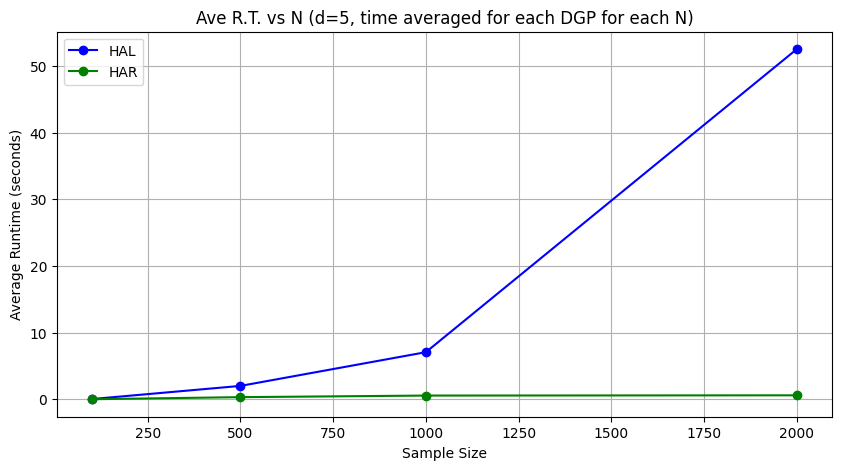

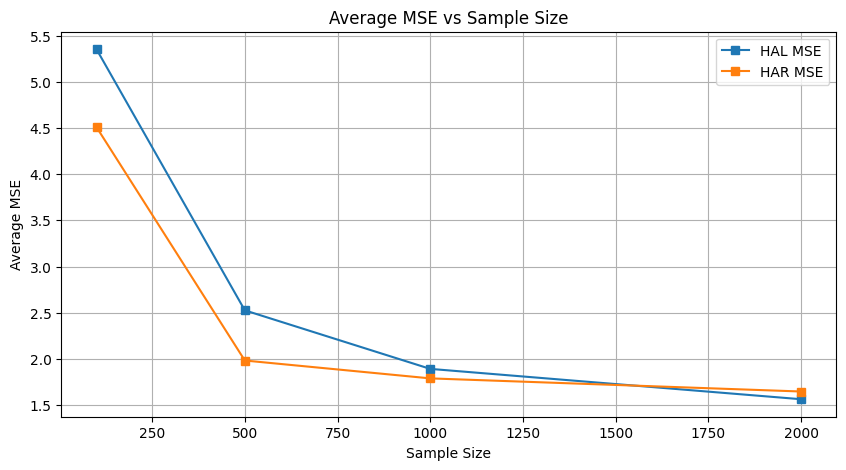

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample sizes to test
sample_sizes = [100, 500, 1000, 2000]

# Initialize a dictionary to store runtimes & MSEs for each model
runtimes = {
    'HAL': [],
    'HAR': []
}
mses = {
    'HAL': [],
    'HAR': []
}

# Loop over each sample size
for n in sample_sizes:
    # Initialize accumulators for runtimes and MSEs
    hal_times, har_times = [], []
    hal_mses, har_mses = [], []

    # Loop over each DGP
    for dgp in dgp_list:
        # Generate data
        X, Y = dgp.generate_data(n, max(d_sizes))
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=42)

        # Fit HAL for given DGP, N, recording runtime and MSE
        hal = HAL()
        start_time = time.time()
        hal.fit(X_train, Y_train)
        hal_times.append(time.time() - start_time)
        hal_mse = mean_squared_error(Y_test, hal.predict(X_test))
        hal_mses.append(hal_mse)


        # Fit HAr for given DGP, N, recording runtime and MSE
        har = HAR()
        start_time = time.time()
        har.fit(X_train, Y_train)
        har_times.append(time.time() - start_time)
        har_mse = mean_squared_error(Y_test, har.predict(X_test))
        har_mses.append(har_mse)

    # Store the average runtime and MSE for each model across all DGPs
    runtimes['HAL'].append(np.mean(hal_times))
    runtimes['HAR'].append(np.mean(har_times))
    mses['HAL'].append(np.mean(hal_mses))
    mses['HAR'].append(np.mean(har_mses))

# Plot Ave R.T. vs N (d=5, time averaged for each DGP for each N)
plt.figure(figsize=(10, 5))
colors = ['blue', 'green']
model_names = ['HAL', 'HAR']

# Loop through each model and plot with a different color
for i, model in enumerate(model_names):
    plt.plot(sample_sizes, runtimes[model], marker='o', label=model, color=colors[i])

plt.title(f'Ave R.T. vs N (d={5}, time averaged for each DGP for each N)')
plt.xlabel('Sample Size')
plt.ylabel('Average Runtime (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MSE vs N 
plt.figure(figsize=(10, 5))
for model, errors in mses.items():
    plt.plot(sample_sizes, errors, marker='s', label=f'{model} MSE')

plt.title('Average MSE vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Average MSE')
plt.legend()
plt.grid(True)
plt.show()

Training and evaluation

In [5]:
from sklearn.metrics import mean_squared_error
import time

# Initialize models
hal = HAL() 
har = HAR()  

# Fit models and record computation time
start_time = time.time()
hal.fit(X_train, y_train)
hal_time = time.time() - start_time

start_time = time.time()
har.fit(X_train, y_train)
har_time = time.time() - start_time

# Evaluate models
hal_mse = mean_squared_error(y_test, hal.predict(X_test))
har_mse = mean_squared_error(y_test, har.predict(X_test))

In [6]:
# Display results
print("HAL MSE: ", hal_mse)
print("HAR MSE: ", har_mse)
print("HAL time: ", hal_time)
print("HAR time: ", har_time)


HAL MSE:  1.3248696023454873
HAR MSE:  1.1878823745413873
HAL time:  0.011644124984741211
HAR time:  0.0008082389831542969


In [7]:
# Now, let's try using sklearn make_regression to generate data! 
# This will give me more flexibility in the number of samples, features, etc. without having to modify the DataGenerator class
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

num_samples = 100

# Generate synthetic data using make_regression
X, Y = make_regression(n_samples=num_samples, n_features=3, noise=0.1)

# from data_generator import DataGenerator
# X, Y = DataGenerator.generate_data(num_samples)

test_size = 0.9 # use 90% of the data for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

In [8]:
# Fit models and record computation time
start_time = time.time()
hal.fit(X_train, y_train)
hal_time = time.time() - start_time

start_time = time.time()
har.fit(X_train, y_train)
har_time = time.time() - start_time

# Evaluate models
hal_mse = mean_squared_error(y_test, hal.predict(X_test))
har_mse = mean_squared_error(y_test, har.predict(X_test))

In [9]:
# Display results
print("HAL MSE: ", hal_mse)
print("HAR MSE: ", har_mse)
print("HAL time: ", hal_time)
print("HAR time: ", har_time)

HAL MSE:  5512.560510604352
HAR MSE:  3249.1976333066077
HAL time:  0.015147209167480469
HAR time:  0.0006997585296630859


# Hey there! this is a jupyter notebook cell
- thing 1
- thing 2 

In [5]:
for i in range(10): 
    print("poop")

poop
poop
poop
poop
poop
poop
poop
poop
poop
poop
